# Descriptive analytics by team Plottwist

## Task 1 
- Cleaning our data 


In [143]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.image as img
from matplotlib.gridspec import GridSpec
from six.moves import urllib
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import calendar
import glob
# import folium
import statistics

%matplotlib inline

## preparing & cleaning data



In [144]:
csv_files = glob.glob('Datasets/RideIndego 2016/*.csv')
df = pd.concat([pd.read_csv(f) for f  in csv_files], ignore_index = True)

### Find out NaN Values

In [145]:
df.isna().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station_id         10
start_lat                17
start_lon                17
end_station_id            0
end_lat                1591
end_lon                1591
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
dtype: int64

### Drop any Row with NaN 0 in end_lat end_lon



In [146]:
df['start_lat'] = pd.to_numeric(df['start_lat'], errors='coerce')
df['start_lon'] = pd.to_numeric(df['start_lon'], errors='coerce')
df['start_station_id'] = pd.to_numeric(df['start_station_id'], errors='coerce')
df['end_station_id'] = pd.to_numeric(df['end_station_id'], errors='coerce')
df['end_lat'] = pd.to_numeric(df['end_lat'], errors='coerce')
df['end_lon'] = pd.to_numeric(df['end_lon'], errors='coerce')
df['bike_id'] = pd.to_numeric(df['bike_id'], errors='coerce')
df['plan_duration'] = pd.to_numeric(df['plan_duration'], errors='coerce')

In [147]:
df.isna().sum()

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station_id         10
start_lat                69
start_lon                69
end_station_id            0
end_lat                3023
end_lon                3023
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
dtype: int64

In [148]:
df = df.dropna(how='any').reset_index(drop=True)
df

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,4516691,600,1/1/2016 0:04,1/1/2016 0:14,3046.0,39.950120,-75.144720,3041,39.968490,-75.135460,3564,30,One Way,Indego30
1,4516692,1320,1/1/2016 0:07,1/1/2016 0:29,3028.0,39.940610,-75.149580,3019,39.954030,-75.149830,2629,30,One Way,Indego30
2,4516693,780,1/1/2016 0:14,1/1/2016 0:27,3007.0,39.945170,-75.159930,3066,39.945610,-75.173480,3430,30,One Way,Indego30
3,4516694,1320,1/1/2016 0:20,1/1/2016 0:42,3005.0,39.947330,-75.144030,3064,39.938400,-75.173270,3351,0,One Way,Walk-up
4,4516695,600,1/1/2016 0:20,1/1/2016 0:30,3045.0,39.947920,-75.162370,3028,39.940610,-75.149580,3715,30,One Way,Indego30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651966,55223960,660,9/30/2016 23:51,10/1/2016 0:02,3023.0,39.950481,-75.172859,3114,39.937752,-75.180122,6725,30,One Way,Indego30
651967,55223958,900,9/30/2016 23:53,10/1/2016 0:08,3032.0,39.945271,-75.179710,3011,39.960461,-75.197006,11031,30,One Way,Indego30
651968,55223957,540,9/30/2016 23:55,10/1/2016 0:04,3007.0,39.945171,-75.159927,3025,39.937241,-75.161201,2706,30,One Way,Indego30
651969,55223956,480,9/30/2016 23:56,10/1/2016 0:04,3007.0,39.945171,-75.159927,3025,39.937241,-75.161201,2497,30,One Way,Indego30


### Further Inspectation of data to prepare descriptive analysis (Marc)


In [149]:
df.describe()

,trip_id,duration,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration
count,6.519710e+05,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000
mean,3.510074e+07,1304.646955,3047.424994,39.952599,-75.168769,3046.760276,39.846196,-74.968480,4017.813906,29.610144
std,2.720246e+07,3656.709547,31.559946,0.070884,0.132684,31.432813,2.056511,3.869193,1735.005923,40.916349
min,4.516691e+06,60.000000,3000.000000,0.000000,-75.223991,3000.000000,0.000000,-75.223991,2472.000000,0.000000
25%,4.725896e+06,480.000000,3023.000000,39.945610,-75.179710,3022.000000,39.945271,-75.179390,3280.000000,30.000000
50%,3.870654e+07,720.000000,3043.000000,39.951120,-75.167351,3041.000000,39.950710,-75.167107,3536.000000,30.000000
75%,5.701548e+07,1200.000000,3063.000000,39.959229,-75.158127,3063.000000,39.957081,-75.156952,5190.000000,30.000000
max,8.758284e+07,86400.000000,3129.000000,39.991791,0.000000,3129.000000,39.991791,0.000000,55195.000000,365.000000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651971 entries, 0 to 651970
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              651971 non-null  int64  
 1   duration             651971 non-null  int64  
 2   start_time           651971 non-null  object 
 3   end_time             651971 non-null  object 
 4   start_station_id     651971 non-null  float64
 5   start_lat            651971 non-null  float64
 6   start_lon            651971 non-null  float64
 7   end_station_id       651971 non-null  int64  
 8   end_lat              651971 non-null  float64
 9   end_lon              651971 non-null  float64
 10  bike_id              651971 non-null  int64  
 11  plan_duration        651971 non-null  int64  
 12  trip_route_category  651971 non-null  object 
 13  passholder_type      651971 non-null  object 
dtypes: float64(5), int64(5), object(4)
memory usage: 69.6+ MB


Alteration of the Dtype from Columns start_station_id and end_station_id to integer

In [151]:
df['start_station_id'] = df['start_station_id'].astype('int64')
df['end_station_id'] = df['end_station_id'].astype('int64')

Alteration of start_time and end_time to datetime type

In [152]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [153]:
df['end_time'] = pd.to_datetime(df['end_time'])

Calculate the length of a trip

In [154]:
df["duration_trip"] = df["end_time"] - df["start_time"]

Now we are breaking the **datetime of start_time into smaller parts(days, time, hour)** to make it possible to visualize the usage over different periods. <p>
We are taking the start_time, not the end_time since it shows the demand.

In [155]:
df['date'] = df['start_time'].dt.strftime('%m-%d')


In [156]:
df["time"] = df["start_time"].apply(lambda dt: dt.time)

In [157]:
df["hour"] = df["start_time"].apply(lambda dt: dt.hour)

In [158]:
df["weekday"] = df["start_time"].apply(lambda dt: dt.dayofweek)

In [159]:
df["month"] = df["start_time"].apply(lambda dt: dt.month)

In [160]:
df["full_date"] = [d.date() for d in df["start_time"]]


In [161]:
df['date_hour'] = df['start_time'].dt.strftime('%m-%d-%H')


In [162]:
#for a later purpose we will convert the duration from seconds to minutes, dividing it by 60:
df["duration"] = df["duration"] / 60

We are inspecting the new changes in the df:

In [163]:
df.head()

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,...,trip_route_category,passholder_type,duration_trip,date,time,hour,weekday,month,full_date,date_hour
0,4516691,10.0,2016-01-01 00:04:00,2016-01-01 00:14:00,3046,39.95012,-75.14472,3041,39.96849,-75.13546,...,One Way,Indego30,0 days 00:10:00,01-01,<built-in method time of Timestamp object at 0...,0,4,1,2016-01-01,01-01-00
1,4516692,22.0,2016-01-01 00:07:00,2016-01-01 00:29:00,3028,39.94061,-75.14958,3019,39.95403,-75.14983,...,One Way,Indego30,0 days 00:22:00,01-01,<built-in method time of Timestamp object at 0...,0,4,1,2016-01-01,01-01-00
2,4516693,13.0,2016-01-01 00:14:00,2016-01-01 00:27:00,3007,39.94517,-75.15993,3066,39.94561,-75.17348,...,One Way,Indego30,0 days 00:13:00,01-01,<built-in method time of Timestamp object at 0...,0,4,1,2016-01-01,01-01-00
3,4516694,22.0,2016-01-01 00:20:00,2016-01-01 00:42:00,3005,39.94733,-75.14403,3064,39.93840,-75.17327,...,One Way,Walk-up,0 days 00:22:00,01-01,<built-in method time of Timestamp object at 0...,0,4,1,2016-01-01,01-01-00
4,4516695,10.0,2016-01-01 00:20:00,2016-01-01 00:30:00,3045,39.94792,-75.16237,3028,39.94061,-75.14958,...,One Way,Indego30,0 days 00:10:00,01-01,<built-in method time of Timestamp object at 0...,0,4,1,2016-01-01,01-01-00


In [164]:
df.describe()

,trip_id,duration,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,duration_trip,hour,weekday,month
count,6.519710e+05,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971.000000,651971,651971.000000,651971.000000,651971.000000
mean,3.510074e+07,21.744116,3047.424994,39.952599,-75.168769,3046.760276,39.846196,-74.968480,4017.813906,29.610144,0 days 00:22:29.216606260,13.867882,2.849348,7.364406
std,2.720246e+07,60.945159,31.559946,0.070884,0.132684,31.432813,2.056511,3.869193,1735.005923,40.916349,0 days 01:33:32.666900885,5.023578,1.925705,2.844950
min,4.516691e+06,1.000000,3000.000000,0.000000,-75.223991,3000.000000,0.000000,-75.223991,2472.000000,0.000000,-1 days +23:04:00,0.000000,0.000000,1.000000
25%,4.725896e+06,8.000000,3023.000000,39.945610,-75.179710,3022.000000,39.945271,-75.179390,3280.000000,30.000000,0 days 00:08:00,10.000000,1.000000,5.000000
50%,3.870654e+07,12.000000,3043.000000,39.951120,-75.167351,3041.000000,39.950710,-75.167107,3536.000000,30.000000,0 days 00:12:00,15.000000,3.000000,8.000000
75%,5.701548e+07,20.000000,3063.000000,39.959229,-75.158127,3063.000000,39.957081,-75.156952,5190.000000,30.000000,0 days 00:20:00,18.000000,4.000000,10.000000
max,8.758284e+07,1440.000000,3129.000000,39.991791,0.000000,3129.000000,39.991791,0.000000,55195.000000,365.000000,19 days 00:59:00,23.000000,6.000000,12.000000


### Including the weather data 

In [268]:
#import weather data
#STR_Nov = pd.read_csv("Car2Go_STR_SampleData.csv", encoding = "ISO-8859-1")
weather = pd.read_csv('Datasets/weather_hourly_philadelphia.csv')

In [269]:
weather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,3.3,3.3,0.0
1,2015-01-02 02:00:00,2.8,2.8,0.0
2,2015-01-02 03:00:00,2.2,2.2,0.0
3,2015-01-02 04:00:00,0.6,0.6,0.0
4,2015-01-02 05:00:00,1.1,1.1,0.0


In [167]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43785 non-null  object 
 1   max_temp   43785 non-null  float64
 2   min_temp   43785 non-null  float64
 3   precip     43785 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [168]:
weather['date_time'] = pd.to_datetime(weather['date_time'])
weather['date'] = weather['date_time'].dt.strftime('%m-%d')
weather['hour'] = weather["date_time"].apply(lambda dt: dt.hour)

In [169]:
weather['date_hour'] = weather['date_time'].dt.strftime('%m-%d-%H')
weather['year'] = pd.DatetimeIndex(weather['date_time']).year
weather = weather[weather['year'] == 2016]

#pd. DatetimeIndex(df['date']). year.
weather.head()

,date_time,max_temp,min_temp,precip,date,hour,date_hour,year
8736,2016-01-01 01:00:00,7.2,7.2,0.0,01-01,1.0,01-01-01,2016.0
8737,2016-01-01 02:00:00,6.7,6.7,0.0,01-01,2.0,01-01-02,2016.0
8738,2016-01-01 03:00:00,6.7,6.7,0.0,01-01,3.0,01-01-03,2016.0
8739,2016-01-01 04:00:00,6.1,6.1,0.0,01-01,4.0,01-01-04,2016.0
8740,2016-01-01 05:00:00,6.1,6.1,0.0,01-01,5.0,01-01-05,2016.0


**Combine both dataframes into one using mapping:**


In [170]:
df_weather = pd.merge(df, weather, on="date_hour", how="left")
df_weather.head()


,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,...,month,full_date,date_hour,date_time,max_temp,min_temp,precip,date_y,hour_y,year
0,4516691,10.0,2016-01-01 00:04:00,2016-01-01 00:14:00,3046,39.95012,-75.14472,3041,39.96849,-75.13546,...,1,2016-01-01,01-01-00,2016-01-01,6.7,6.7,0.0,01-01,0.0,2016.0
1,4516692,22.0,2016-01-01 00:07:00,2016-01-01 00:29:00,3028,39.94061,-75.14958,3019,39.95403,-75.14983,...,1,2016-01-01,01-01-00,2016-01-01,6.7,6.7,0.0,01-01,0.0,2016.0
2,4516693,13.0,2016-01-01 00:14:00,2016-01-01 00:27:00,3007,39.94517,-75.15993,3066,39.94561,-75.17348,...,1,2016-01-01,01-01-00,2016-01-01,6.7,6.7,0.0,01-01,0.0,2016.0
3,4516694,22.0,2016-01-01 00:20:00,2016-01-01 00:42:00,3005,39.94733,-75.14403,3064,39.93840,-75.17327,...,1,2016-01-01,01-01-00,2016-01-01,6.7,6.7,0.0,01-01,0.0,2016.0
4,4516695,10.0,2016-01-01 00:20:00,2016-01-01 00:30:00,3045,39.94792,-75.16237,3028,39.94061,-75.14958,...,1,2016-01-01,01-01-00,2016-01-01,6.7,6.7,0.0,01-01,0.0,2016.0


# Task 2: Descriptive analytics

### a) Temporal Demand Patterns and Seasonality (Lina, Marc)

**Hourly demand:**

In [171]:
hourly_demand = df.groupby(["date","hour"])["trip_id"].nunique()
hourly_demand = pd.DataFrame(hourly_demand)
hourly_demand


trip_id
date  hour         
01-01 0          26
      1          40
      2          33
      3           6
      4           1
...             ...
12-31 19         28
      20         29
      21         18
      22         21
      23         12

[8535 rows x 1 columns]

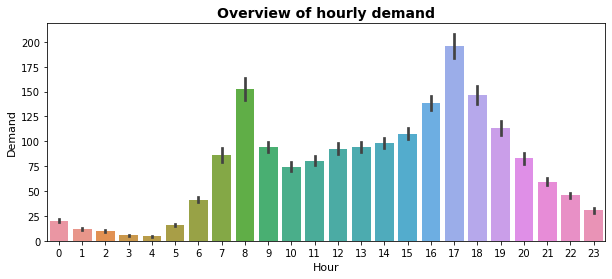

In [172]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=hourly_demand.index.get_level_values(1), y=hourly_demand["trip_id"],ax=ax)
pp.xlabel('Hour', fontdict={'size':11})
pp.ylabel("Demand", fontdict={"size":11})
pp.title("Overview of hourly demand", fontsize=14.0, fontweight='bold')

pp.show()

**Daily demand**

In [173]:

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

daily_demand = df.groupby(["month","weekday"])["trip_id"].nunique()
daily_demand = pd.DataFrame(daily_demand)
daily_demand

trip_id
month weekday         
1     0           1836
      1           2023
      2           2538
      3           3083
      4           3790
...                ...
12    2           5366
      3           6780
      4           6164
      5           3453
      6           2860

[84 rows x 1 columns]

In [174]:
daily_demand.columns.values

array(['trip_id'], dtype=object)

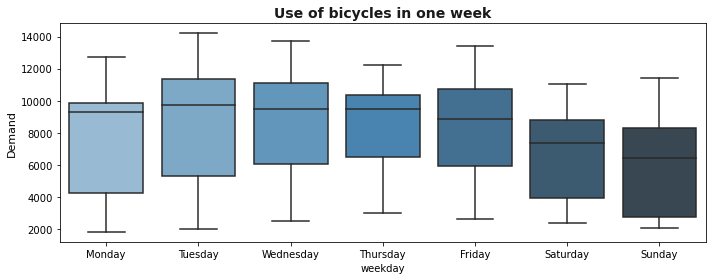

In [175]:
fig, ax = pp.subplots(figsize=(10,4))

sns.boxplot(x=daily_demand.index.get_level_values(1),y=daily_demand["trip_id"],palette = 'Blues_d')

pp.ylabel("Demand", fontsize=11)
pp.title("Use of bicycles in one week", fontsize=14, fontweight="bold", color="k")
pp.tight_layout()
pp.gca().set_xticklabels(\
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);

pp.show()

**Monthly demand**

In [176]:
monthly_demand = df.groupby(["month"])["trip_id"].nunique()

monthly_demand = pd.DataFrame(monthly_demand)
monthly_demand

,trip_id
month,
1,17773
2,19284
3,36102
4,42324
5,55922
6,72578
7,76215
8,77673
9,79578


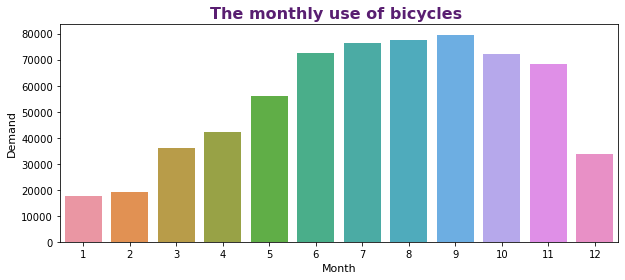

In [177]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=monthly_demand.index.get_level_values(0), y=monthly_demand["trip_id"],ax=ax)
pp.xlabel("Month", fontsize=11)
pp.ylabel("Demand", fontsize=11)
sns.set_color_codes("dark")
pp.title("The monthly use of bicycles ", fontsize=16, fontweight="bold", color="m")
pp.show()

## b) Geographical Demand Patterns

In [178]:
#start_stations and their location
start_stations = df.groupby(["start_station_id"])["start_lat","start_lon"].mean()
start_stations = pd.DataFrame(start_stations)

start_stations

,start_lat,start_lon
start_station_id,,
3000,0.000000,0.000000
3004,39.953781,-75.163741
3005,39.947330,-75.144029
3006,39.952201,-75.203110
3007,39.945171,-75.159928
...,...,...
3122,39.980621,-75.173500
3123,39.980042,-75.170882
3124,39.952950,-75.139792


In [179]:
#popularity of start_stations
start_pop = df.groupby(["start_station_id"])["trip_id"].nunique()
start_pop = pd.DataFrame(start_pop)
start_pop

,trip_id
start_station_id,
3000,2
3004,9679
3005,4275
3006,8314
3007,12387
...,...
3122,667
3123,1028
3124,3751


In [180]:
start_stations_sample = start_stations.join(start_pop)
start_stations_sample

,start_lat,start_lon,trip_id
start_station_id,,,
3000,0.000000,0.000000,2
3004,39.953781,-75.163741,9679
3005,39.947330,-75.144029,4275
3006,39.952201,-75.203110,8314
3007,39.945171,-75.159928,12387
...,...,...,...
3122,39.980621,-75.173500,667
3123,39.980042,-75.170882,1028
3124,39.952950,-75.139792,3751


In [181]:
#the station with index 3000 is a "Virtual Station" so we drop it from our df
start_stations_sample.drop([3000], inplace=True)

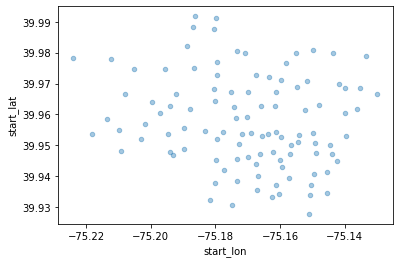

In [182]:
start_stations_sample.plot(kind="scatter", x="start_lon", y="start_lat", alpha=0.4)
pp.show()

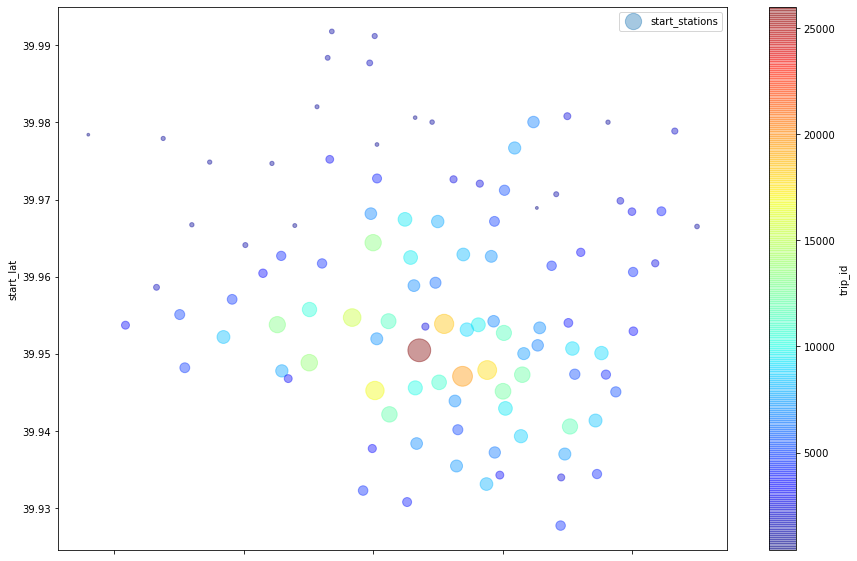

In [183]:
start_stations_sample.plot(kind="scatter", x="start_lon", y="start_lat",
                          s=start_stations_sample["trip_id"]/50, label="start_stations", c="trip_id",
                          cmap=pp.get_cmap("jet"), colorbar=True, alpha=0.4, figsize=(15,10))
pp.legend()
pp.show()

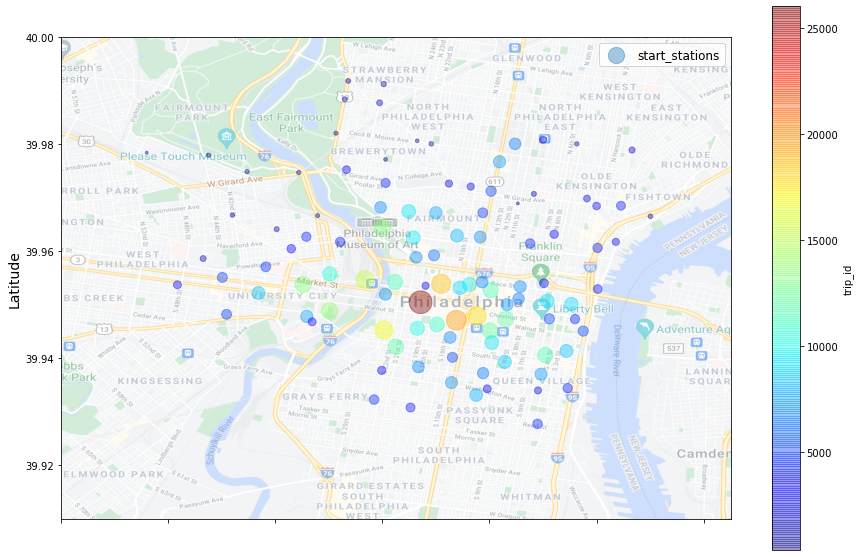

In [184]:
philadelphia_map=img.imread("Datasets/Map_Philadelphia_20210720.png")
ax = start_stations_sample.plot(kind="scatter", x="start_lon", y="start_lat",
                          s=start_stations_sample["trip_id"]/50, label="start_stations", c="trip_id",
                          cmap=pp.get_cmap("jet"), colorbar=True, alpha=0.4, figsize=(15,10))
pp.imshow(philadelphia_map, extent=[-75.24,-75.115,39.91,40], alpha=0.5)
pp.ylabel("Latitude", fontsize=14)
pp.xlabel("Longitude", fontsize=14)

pp.legend(fontsize=12)
pp.show()

In [185]:
#end_stations and their location
end_stations = df.groupby(["end_station_id"])["end_lat","end_lon"].mean()
end_stations = pd.DataFrame(end_stations)

end_stations

,end_lat,end_lon
end_station_id,,
3000,0.000000,0.000000
3004,39.953781,-75.163741
3005,39.947330,-75.144029
3006,39.952201,-75.203110
3007,39.945171,-75.159928
...,...,...
3122,39.980621,-75.173500
3123,39.980042,-75.170882
3124,39.952950,-75.139792


In [186]:
#popularity of end_station
end_pop = df.groupby(["end_station_id"])["trip_id"].nunique()
end_pop = pd.DataFrame(end_pop)
end_pop

,trip_id
end_station_id,
3000,1732
3004,10465
3005,4812
3006,7420
3007,12939
...,...
3122,651
3123,878
3124,4123


In [187]:
end_stations_sample = end_stations.join(end_pop)
end_stations_sample

,end_lat,end_lon,trip_id
end_station_id,,,
3000,0.000000,0.000000,1732
3004,39.953781,-75.163741,10465
3005,39.947330,-75.144029,4812
3006,39.952201,-75.203110,7420
3007,39.945171,-75.159928,12939
...,...,...,...
3122,39.980621,-75.173500,651
3123,39.980042,-75.170882,878
3124,39.952950,-75.139792,4123


In [188]:
#the station with index 3000 is a "Virtual Station" so we drop it from our df
end_stations_sample.drop([3000], inplace=True)

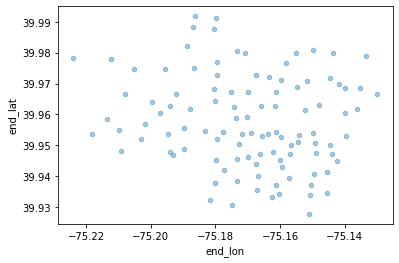

In [189]:
end_stations_sample.plot(kind="scatter", x="end_lon", y="end_lat", alpha=0.4)
pp.show()

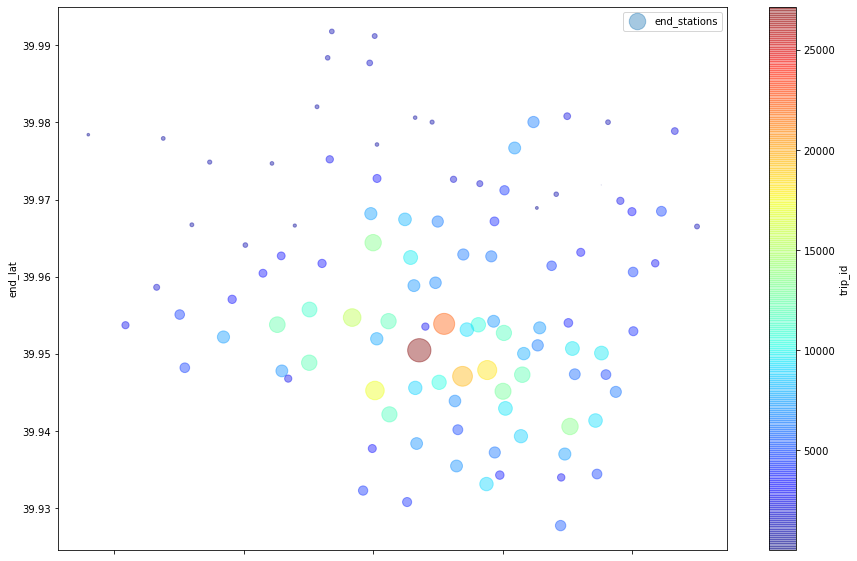

In [190]:
end_stations_sample.plot(kind="scatter", x="end_lon", y="end_lat",
                          s=end_stations_sample["trip_id"]/50, label="end_stations", c="trip_id",
                          cmap=pp.get_cmap("jet"), colorbar=True, alpha=0.4, figsize=(15,10))
pp.legend()
pp.show()

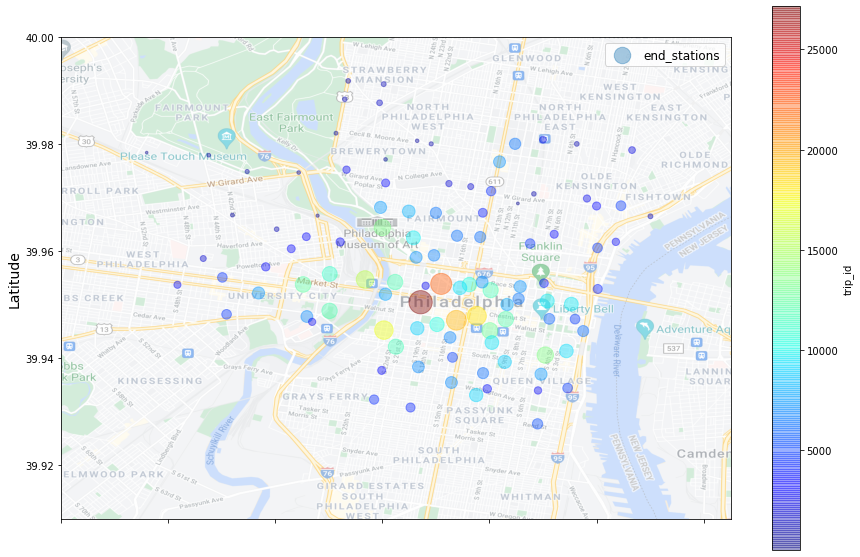

In [191]:
philadelphia_map=img.imread("Datasets/Map_Philadelphia_20210720.png")
ax = end_stations_sample.plot(kind="scatter", x="end_lon", y="end_lat",
                          s=end_stations_sample["trip_id"]/50, label="end_stations", c="trip_id",
                          cmap=pp.get_cmap("jet"), colorbar=True, alpha=0.4, figsize=(15,10))
pp.imshow(philadelphia_map, extent=[-75.24,-75.115,39.91,40], alpha=0.5)
pp.ylabel("Latitude", fontsize=14)
pp.xlabel("Longitude", fontsize=14)

pp.legend(fontsize=12)
pp.show()

### c) KPIs

#### Flexible revenue per hour

Our first KPI is the current gross revenue which is calculated by the duration of the trip times $0,15 which is listed as the price/minute on Indego's website. We have to make some adjustments based depending on the type of pass the user has. For that we create a new dataframe only containing relevant data for us which includes the duration of the trip, the ID, the passtype, as well as some time info.

In [192]:
price_per_minute = 0.15

In [193]:
rev = df[['trip_id', 'duration', 'start_time', 'end_time', 'passholder_type', 'hour','date_hour']].copy()

In [194]:
rev.head()

,trip_id,duration,start_time,end_time,passholder_type,hour,date_hour
0,4516691,10.0,2016-01-01 00:04:00,2016-01-01 00:14:00,Indego30,0,01-01-00
1,4516692,22.0,2016-01-01 00:07:00,2016-01-01 00:29:00,Indego30,0,01-01-00
2,4516693,13.0,2016-01-01 00:14:00,2016-01-01 00:27:00,Indego30,0,01-01-00
3,4516694,22.0,2016-01-01 00:20:00,2016-01-01 00:42:00,Walk-up,0,01-01-00
4,4516695,10.0,2016-01-01 00:20:00,2016-01-01 00:30:00,Indego30,0,01-01-00


In [195]:
a = rev['passholder_type'].unique()
a

array(['Indego30', 'Walk-up', 'IndegoFlex'], dtype=object)

In [196]:
rev['relevant_duration'] = rev.duration + rev.passholder_type.map( lambda x: -30 if x == 'Walk-up' else -60)

In [197]:
rev.head()

,trip_id,duration,start_time,end_time,passholder_type,hour,date_hour,relevant_duration
0,4516691,10.0,2016-01-01 00:04:00,2016-01-01 00:14:00,Indego30,0,01-01-00,-50.0
1,4516692,22.0,2016-01-01 00:07:00,2016-01-01 00:29:00,Indego30,0,01-01-00,-38.0
2,4516693,13.0,2016-01-01 00:14:00,2016-01-01 00:27:00,Indego30,0,01-01-00,-47.0
3,4516694,22.0,2016-01-01 00:20:00,2016-01-01 00:42:00,Walk-up,0,01-01-00,-8.0
4,4516695,10.0,2016-01-01 00:20:00,2016-01-01 00:30:00,Indego30,0,01-01-00,-50.0


In [198]:
rev.loc[rev.relevant_duration <= 0, "relevant_duration"] = 0

In [199]:
rev["rev_flex"] = rev["relevant_duration"] * price_per_minute

In [200]:
rev.head()

,trip_id,duration,start_time,end_time,passholder_type,hour,date_hour,relevant_duration,rev_flex
0,4516691,10.0,2016-01-01 00:04:00,2016-01-01 00:14:00,Indego30,0,01-01-00,0.0,0.0
1,4516692,22.0,2016-01-01 00:07:00,2016-01-01 00:29:00,Indego30,0,01-01-00,0.0,0.0
2,4516693,13.0,2016-01-01 00:14:00,2016-01-01 00:27:00,Indego30,0,01-01-00,0.0,0.0
3,4516694,22.0,2016-01-01 00:20:00,2016-01-01 00:42:00,Walk-up,0,01-01-00,0.0,0.0
4,4516695,10.0,2016-01-01 00:20:00,2016-01-01 00:30:00,Indego30,0,01-01-00,0.0,0.0


"Flexible" revenue in total:

In [201]:
sum(rev["rev_flex"])

624540.7500000183

In [202]:
hourly_rev = rev.groupby(["date_hour"]).agg(revenue=("rev_flex", 'sum'))
hourly_rev = pd.DataFrame(hourly_rev)
hourly_rev

,revenue
date_hour,
01-01-00,81.15
01-01-01,360.45
01-01-02,271.35
01-01-03,40.35
01-01-04,0.00
...,...
12-31-19,3.75
12-31-20,0.00
12-31-21,87.75


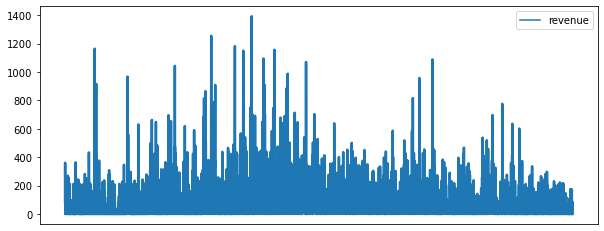

In [203]:
fig, ax = pp.subplots(figsize=(10,4))

kpi1 = sns.lineplot(data=hourly_rev, palette="tab10", linewidth=2.5)
kpi1.set(xticklabels=[])  # remove the tick labels
kpi1.set(xlabel=None)
kpi1.tick_params(bottom=False)

pp.show()

KPI: **walkups vs. passcard holder**

We are now computing the hourly values of regular costumers vs. walkups without a member ticket. This is in indication of the type of person that uses the bikes and supports marketing activities to adress a certain group.

In [204]:
type_shares = df[['passholder_type', 'date_hour']].copy()

In [205]:
type_shares['type'] = type_shares.passholder_type.map( lambda x: 0 if x == 'Walk-up' else 1)

In [206]:
type_shares.head()

,passholder_type,date_hour,type
0,Indego30,01-01-00,1
1,Indego30,01-01-00,1
2,Indego30,01-01-00,1
3,Walk-up,01-01-00,0
4,Indego30,01-01-00,1


In [207]:
hourly_share = type_shares.groupby(["date_hour", "type"]).count()
hourly_share = pd.DataFrame(hourly_share)


In [208]:
hourly_share_per = hourly_share.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [209]:
hourly_share_per_filt = hourly_share_per[hourly_share_per.index.get_level_values(1) == 1]
hourly_share_per_filt

,,passholder_type
date_hour,type,
01-01-00,1,57.692308
01-01-01,1,30.000000
01-01-02,1,36.363636
01-01-03,1,83.333333
01-01-04,1,100.000000
...,...,...
12-31-19,1,89.285714
12-31-20,1,86.206897
12-31-21,1,94.444444


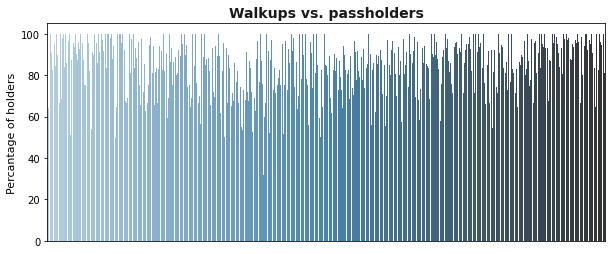

In [210]:
fig, ax = pp.subplots(figsize=(10,4))

kpi2 = sns.barplot(x=hourly_share_per_filt.index.get_level_values(0),y=hourly_share_per_filt["passholder_type"],palette = 'Blues_d')

pp.ylabel("Percantage of holders", fontsize=11)
pp.xlabel("Time", fontsize=11)
pp.title("Walkups vs. passholders", fontsize=14, fontweight="bold", color="k")

    
kpi2.set(xticklabels=[])  
kpi2.set(xlabel=None)
kpi2.tick_params(bottom=False)

pp.show()


#  Task 3: Predictive Analytics

Needed for the regression:

In [211]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

## Philadelphia weather in 2016

**Calculate the weather over the year:**

In [212]:
weather_month = df_weather.groupby(["month"]).agg(Temperature =("max_temp", 'mean'))
weather_month = pd.DataFrame(weather_month)
weather_month


,Temperature
month,
1,1.871327
2,5.013163
3,12.008359
4,13.794522
5,18.359349
6,23.889473
7,27.489751
8,27.237493
9,23.435936


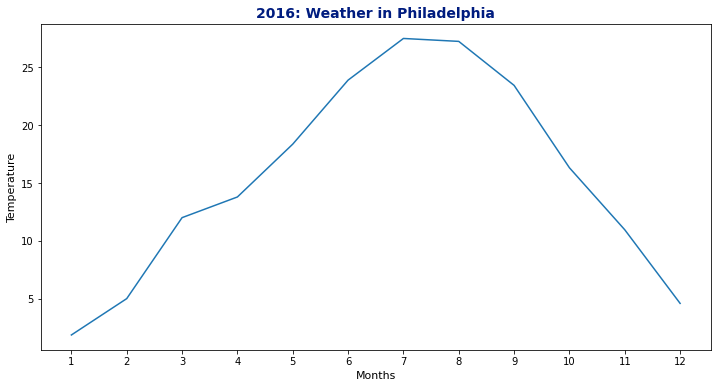

In [213]:
fig, ax = pp.subplots(figsize=(12,6))

sns.lineplot(x=weather_month.index.get_level_values(0), y=weather_month["Temperature"],ax=ax)
dim=np.arange(1,13,1)
pp.xticks(dim)
pp.xlabel("Months", fontsize=11)
pp.ylabel("Temperature", fontsize=11)
pp.title("2016: Weather in Philadelphia", fontsize=14, fontweight="bold", color="b")
pp.show()

### Demand and temperatures in comparison 

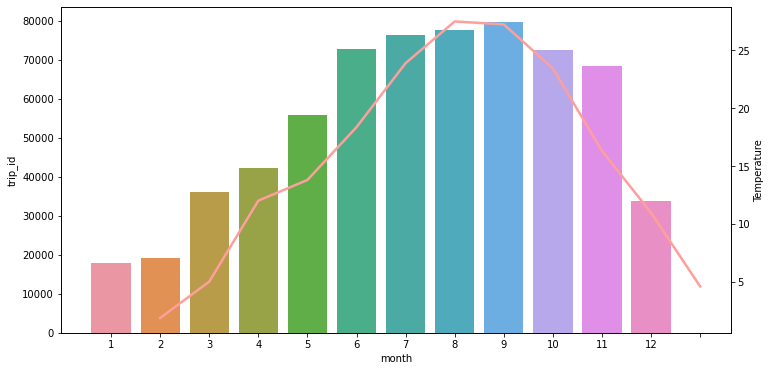

In [214]:
fig, ax = pp.subplots(figsize=(12,6))

sns.barplot(x=monthly_demand.index.get_level_values(0), y=monthly_demand["trip_id"],ax=ax)
sns.set_color_codes("pastel")
ax2=ax.twinx()
sns.lineplot(x=weather_month.index.get_level_values(0), y=weather_month["Temperature"],ax=ax2, color="r", linewidth=2.5)
dim=np.arange(0,13,1)
pp.xticks(dim)

pp.show()

Future demand is a key factor that will steer operational decision making of a shared rental network. As a data scientist it is your responsibility to facilitate this type of decision support. For the purpose of this assignment we will be interested in forecasting total system-level demand in the next hour. To do so, develop a prediction model that predicts bike rental demand as a function of suitable features available in or derived from the datasets (incl. the weather data).

First of all, we are going to create a table that contains the demand of the hour along with some **features as temperature, the hour of course, the day of the week and the time of the year.**

In [215]:
new_df_merged = pd.merge(weather, hourly_demand, on=["date", "hour"], how = "left")
new_df_merged["demand"] = new_df_merged["trip_id"]
new_df_merged["weekday"] = new_df_merged["date_time"].apply(lambda dt: dt.dayofweek)
new_df_merged["month"] = new_df_merged["date_time"].apply(lambda dt: dt.month)
new_df_merged

,date_time,max_temp,min_temp,precip,date,hour,date_hour,year,trip_id,demand,weekday,month
0,2016-01-01 01:00:00,7.2,7.2,0.0,01-01,1.0,01-01-01,2016.0,40.0,40.0,4,1
1,2016-01-01 02:00:00,6.7,6.7,0.0,01-01,2.0,01-01-02,2016.0,33.0,33.0,4,1
2,2016-01-01 03:00:00,6.7,6.7,0.0,01-01,3.0,01-01-03,2016.0,6.0,6.0,4,1
3,2016-01-01 04:00:00,6.1,6.1,0.0,01-01,4.0,01-01-04,2016.0,1.0,1.0,4,1
4,2016-01-01 05:00:00,6.1,6.1,0.0,01-01,5.0,01-01-05,2016.0,4.0,4.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8775,2016-12-31 19:00:00,6.1,6.1,0.0,12-31,19.0,12-31-19,2016.0,28.0,28.0,5,12
8776,2016-12-31 20:00:00,6.7,6.7,0.0,12-31,20.0,12-31-20,2016.0,29.0,29.0,5,12
8777,2016-12-31 21:00:00,6.7,6.7,0.0,12-31,21.0,12-31-21,2016.0,18.0,18.0,5,12
8778,2016-12-31 22:00:00,6.7,6.7,0.0,12-31,22.0,12-31-22,2016.0,21.0,21.0,5,12


In [216]:
#Drop columns that are not relevant for the regression
new_df_merged.drop(columns = ['trip_id', 'year'])

,date_time,max_temp,min_temp,precip,date,hour,date_hour,demand,weekday,month
0,2016-01-01 01:00:00,7.2,7.2,0.0,01-01,1.0,01-01-01,40.0,4,1
1,2016-01-01 02:00:00,6.7,6.7,0.0,01-01,2.0,01-01-02,33.0,4,1
2,2016-01-01 03:00:00,6.7,6.7,0.0,01-01,3.0,01-01-03,6.0,4,1
3,2016-01-01 04:00:00,6.1,6.1,0.0,01-01,4.0,01-01-04,1.0,4,1
4,2016-01-01 05:00:00,6.1,6.1,0.0,01-01,5.0,01-01-05,4.0,4,1
...,...,...,...,...,...,...,...,...,...,...
8775,2016-12-31 19:00:00,6.1,6.1,0.0,12-31,19.0,12-31-19,28.0,5,12
8776,2016-12-31 20:00:00,6.7,6.7,0.0,12-31,20.0,12-31-20,29.0,5,12
8777,2016-12-31 21:00:00,6.7,6.7,0.0,12-31,21.0,12-31-21,18.0,5,12
8778,2016-12-31 22:00:00,6.7,6.7,0.0,12-31,22.0,12-31-22,21.0,5,12


Here we check whether holidays like the 4th of July are having an impact on demand. If they do, they could be a feature.

In [217]:
july = new_df_merged[new_df_merged['month'] == 7]


In [218]:
july_grouped = july.groupby(["date"])["demand"].sum()
july_grouped = pd.DataFrame(july_grouped)



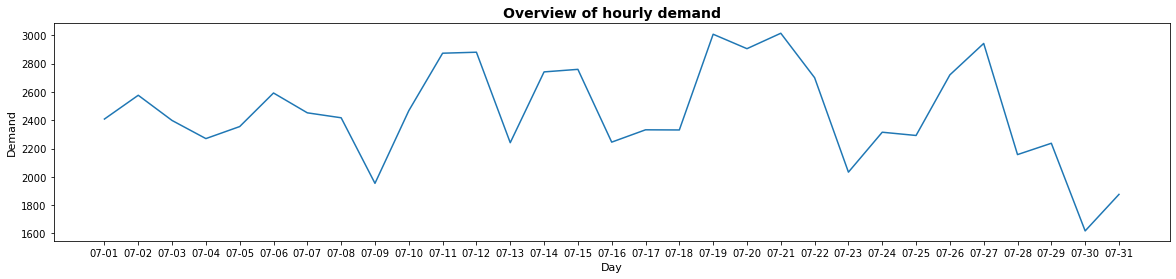

In [219]:
fig, ax = pp.subplots(figsize=(20,4))

sns.lineplot(x=july_grouped.index.get_level_values(0), y=july_grouped["demand"],ax=ax)
pp.xlabel('Day', fontdict={'size':11})
pp.ylabel("Demand", fontdict={"size":11})
pp.title("Overview of hourly demand", fontsize=14.0, fontweight='bold')

pp.show()

### Finally, the regression models are following:

Each model will be evaluated after implementation.

We create another data frame to use for **Regression:**

In [220]:
df_1 = new_df_merged

df_1["IsWeekday"] = df_1["weekday"].apply(lambda x: 1 if x<=4 else 0)

In [221]:
df_1["summer"] = df_1["month"].apply(lambda x: 1 if (x> 5 & x<12) else 0)

In [222]:
X = df_1[["max_temp", "IsWeekday", "hour", "precip", "summer"]]
y = df_1[["demand"]]
y['demand'] = df_1['demand'].fillna(0)

In [223]:
#Splitting the data to avoid overfitting and enable testing
features=list(zip(X["max_temp"],X["precip"], X["IsWeekday"], X["summer"], X["hour"]))
# Do a 70-30 split first
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3,random_state=34 )

# now split X_train to achive 50-20-30 split
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=34 )


Model Nr 1: **Decision Tree**

We find the optimal tree depth using a graph:

In [224]:
def find_tree_depth (x,y):
    
    
    err_train = [] 
    err_test = []
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)
    
   
    
    for n in np.arange(1,21): 
        
       
        
        tree_reg = DecisionTreeRegressor(max_depth=n)
        tree_model = tree_reg.fit(x_train,y_train)
        
        
        
        err_train.append(mean_absolute_error(y_train, tree_model.predict(x_train)))
        err_test.append(mean_absolute_error(y_test, tree_model.predict(x_test)))


    pp.figure(figsize = (8,6))
    pp.plot(np.arange(1,21), err_train,np.arange(1,21), err_test)
    pp.legend(["Training", "Validation"])
    pp.xlabel("Max Tree Depth")
    pp.ylabel("MAE")
    pp.title("Search over max_depth parameter",fontsize=14)

    pp.show()


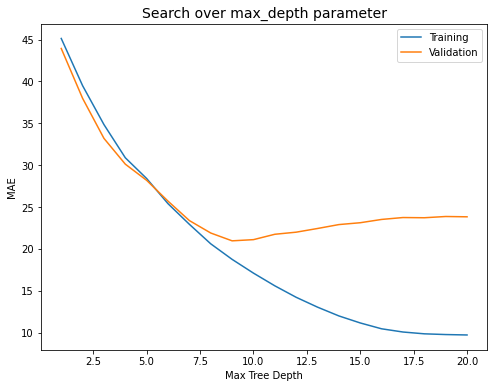

In [225]:
find_tree_depth (features,y)

In [226]:
# We implement the optimal depth, which is roughly at 9 as we can see above.
Tree_reg = DecisionTreeRegressor(max_depth=9)
tree_model = Tree_reg.fit(X_train, y_train) 


y_hat_tree = tree_model.predict(X_test)

In [227]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_tree, y_test), "demand")
print("RMSE:",(mean_squared_error(y_hat_tree, y_test))**(0.5), "demand")  
print("R2:",r2_score(y_test, y_hat_tree))

Test set performance:
MAE: 22.297963451913223 demand
RMSE: 36.70739828623061 demand
R2: 0.7551006736548722


Model Nr 2: **KNN**

In [228]:
def find_knn (x,y,max_k):
    
    err_train = [] 
    err_test = []
    

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(X_train, y_train)


        # compute errors
        err_train.append(mean_absolute_error(KNN_model.predict(X_train), y_train))
        err_test.append(mean_absolute_error(KNN_model.predict(X_test), y_test))
        
    pp.figure(figsize = (8,6))
    pp.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    pp.legend(["Training", "Validation"])
    pp.xlabel("Number of neighbors")
    pp.ylabel("MAE")
    #plt.ylim((0,1))
    pp.show()


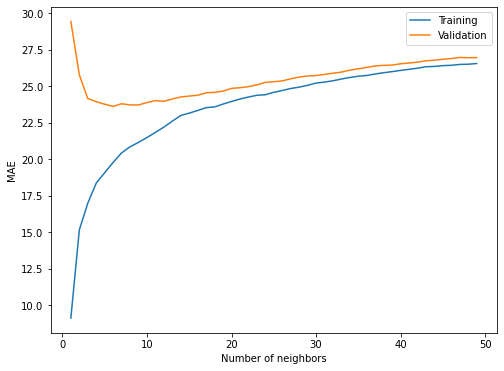

In [229]:
find_knn (features,y,max_k=50)

In [230]:
KNN_reg = KNeighborsRegressor(n_neighbors=13)
KNN_model = KNN_reg.fit(X_train, y_train) 

# Predict
y_hat_KNN = KNN_model.predict(X_test)

In [231]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "demand")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "demand")  
print("R2:",r2_score(y_test, y_hat_KNN))

Test set performance:
MAE: 24.12522633023772 demand
RMSE: 38.27327558935844 demand
R2: 0.7337610158566543


### Model Nr 3: **Ridge regression (L2 Regularization)**

In [232]:
lm = LinearRegression(fit_intercept=True, normalize=False)

In [233]:
xp = new_df_merged["max_temp"].values
yp = new_df_merged["demand"].values

In [234]:
def plot_regression_poly_scikit(X,Y,d):
    
    
    err_train = [] 
    err_test = []
    
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)
    
   
    
    pp.figure(figsize = (12,8))
    pp.scatter(X,Y,marker="x", c='C2')
    ylim = pp.ylim()
    pp.plot(x_fit,y_pred, c='C1')
    pp.xlabel("Temperature (°C)", fontsize="16")
    pp.ylabel("Demand (GW)", fontsize="16")
    pp.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
    pp.ylim(ylim)
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)


In [235]:
from sklearn.preprocessing import PolynomialFeatures

# initialize model
ridge_poly = PolynomialFeatures(degree = 50)

# fit and transform xp
x_poly = ridge_poly.fit_transform(xp.reshape(-1,1))

In [236]:
from sklearn.linear_model import Ridge

model_L2 = Ridge(alpha = 0.01, normalize = True, solver = 'lsqr') 

model_L2.fit(x_poly, y)
y_hat_modelL2 = model_L2.predict(x_poly)

print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )

Coefficients  [[ 0.00000000e+00  2.48675243e+00  2.16910619e-02  4.71659469e-06
  -8.94259553e-06 -3.07395163e-07 -7.21446734e-09 -1.16468259e-10
  -4.64322878e-13  6.16356479e-14  3.46260397e-15  1.32630493e-16
   4.33184616e-18  1.28638884e-19  3.56591466e-21  9.33254102e-23
   2.31202143e-24  5.39277960e-26  1.16409627e-27  2.22571978e-29
   3.28384336e-31  1.08042593e-33 -1.86633435e-34 -1.08736013e-35
  -4.47898803e-37 -1.60905872e-38 -5.35837711e-40 -1.69813433e-41
  -5.19177867e-43 -1.54342830e-44 -4.48297980e-46 -1.27595456e-47
  -3.56470543e-49 -9.78233000e-51 -2.63646859e-52 -6.97099313e-54
  -1.80422265e-55 -4.55332491e-57 -1.11321703e-58 -2.60685803e-60
  -5.72279217e-62 -1.12294980e-63 -1.70447045e-65 -4.92797573e-68
   1.12339608e-68  6.83681544e-70  2.98800391e-71  1.14732494e-72
   4.10744719e-74  1.40685846e-75  4.67337128e-77]] 
Intercept  [33.43871472]


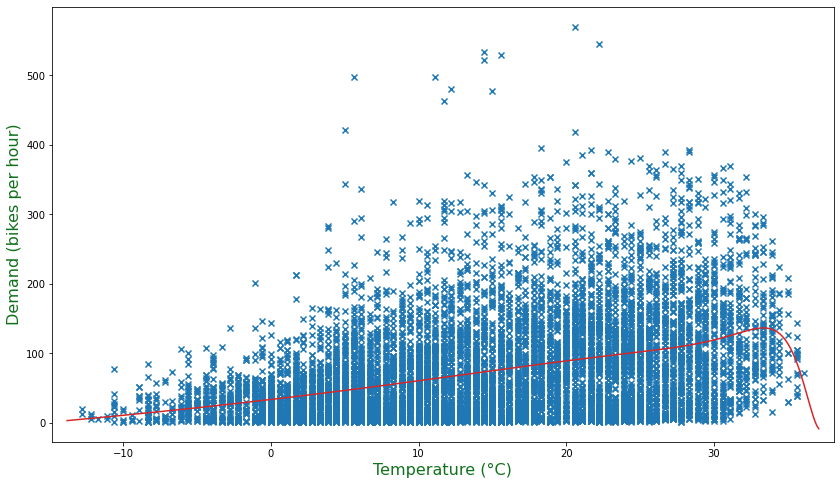

In [237]:
def plot_scikit_output (x, y, fitted_model):
    
    min_x, max_x = x.min(), x.max()
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    
    xt0_poly = ridge_poly.fit_transform(xt0.reshape(-1,1))
    
    # plotting routine
    pp.figure(figsize = (14,8))
    pp.scatter(x, y, marker="x")
    ylim = pp.ylim()
    pp.plot(xt0, fitted_model.predict(xt0_poly), 'C3')
    sns.set_color_codes("dark")
    pp.xlabel("Temperature (°C)", fontsize="16", color="g")
    pp.ylabel("Demand (bikes per hour)", fontsize="16", color="g")
    pp.xlim([min_x-2, max_x+2])
    pp.ylim(ylim)
    
    
plot_scikit_output (xp, yp, model_L2)

# 4. Extras 

In [238]:
#calculate trips per bike
use_bikes = df.groupby(["bike_id"], as_index=False)["trip_id"].count()

In [239]:
use_bikes["trips"] = use_bikes["trip_id"]
use_bikes.drop("trip_id",axis= 1,inplace=True)

In [240]:
use_bikes.head()

,bike_id,trips
0,2472,680
1,2473,687
2,2474,625
3,2475,690
4,2476,646


In [241]:
#average trips per bike
y = statistics.mean(use_bikes["trips"])
y

636.6904296875

In [242]:
#maximum trips per bike
max__= use_bikes["trips"].max()
max__

1056

In [243]:
#minimun trips per bike
min__ = use_bikes["trips"].min()
min__

18

In [244]:
#average trips per bike daily
use_bikes["trip/day"] = use_bikes["trips"].div(356)
#average trips per bike hourly
use_bikes["trip/hour"] = use_bikes["trips"].div(8760)
use_bikes.head()

,bike_id,trips,trip/day,trip/hour
0,2472,680,1.910112,0.077626
1,2473,687,1.929775,0.078425
2,2474,625,1.755618,0.071347
3,2475,690,1.938202,0.078767
4,2476,646,1.814607,0.073744


In [245]:
#average trips per bike(hourly)
mean = statistics.mean(use_bikes["trip/hour"])
mean
#minimun trips per bike(hourly)
min_ = use_bikes["trip/hour"].min()
min_
#maximum trips per bike(hourly)
max_ = use_bikes["trip/hour"].max()
max_

0.12054794520547946

In [246]:
#ajusting start_time to datetime type
df["start_time"] = pd.to_datetime(df["start_time"])
df['date_hour'] = df['start_time'].dt.strftime('%m-%d-%H')
df["hour"] = df["start_time"].apply(lambda dt: dt.hour)

In [247]:
#merging the datasets
bikes_info = pd.merge(df,use_bikes, on="bike_id")
#droping the irrelevant columns
bikes_info.drop(["plan_duration","trip_route_category","passholder_type","start_lon","start_lat","end_lat","end_lon"],axis=1, inplace =True)

In [248]:
bike_info = bikes_info[bikes_info["bike_id"] == 5348]
bike_info = bike_info.groupby(["hour"])["trip_id"].nunique()
bike_info = pd.DataFrame(bike_info)
bike_info.head()

,trip_id
hour,
0,1
3,1
6,1
9,3
10,1


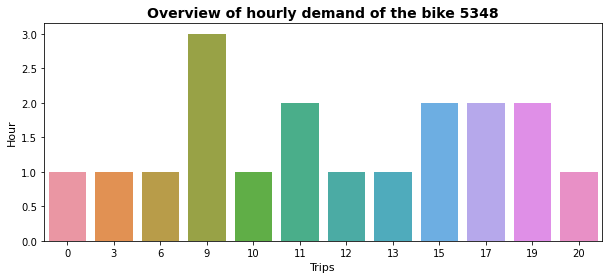

In [249]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=bike_info.index.get_level_values(0), y=bike_info["trip_id"],ax=ax)
pp.xlabel("Trips", fontdict={'size':11})
pp.ylabel("Hour", fontdict={"size":11})
pp.title("Overview of hourly demand of the bike 5348", fontsize=14.0, fontweight='bold')

pp.show()

In [250]:
bike_info1 = bikes_info[bikes_info["bike_id"] == 3724]
bike_info1 = bike_info1.groupby(["hour"])["trip_id"].nunique()
bike_info1 = pd.DataFrame(bike_info1)
bike_info1.head()

,trip_id
hour,
0,10
1,7
2,8
3,3
4,2


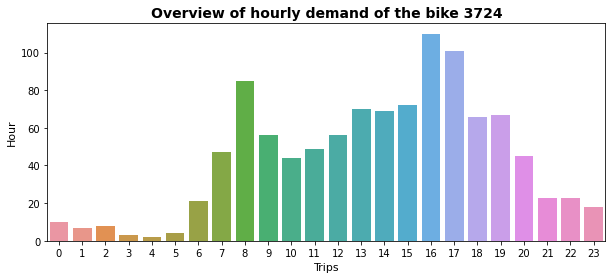

In [251]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=bike_info1.index.get_level_values(0), y=bike_info1["trip_id"],ax=ax)
pp.xlabel("Trips", fontdict={'size':11})
pp.ylabel("Hour", fontdict={"size":11})
pp.title("Overview of hourly demand of the bike 3724", fontsize=14.0, fontweight='bold')

pp.show()

## Status_Information

In [265]:
sta = pd.read_csv(r"Datasets/indego-stations-2021-01-01")

In [266]:
#convert to datetime so that we can manipulate the dates
sta["Go_live_date"] = pd.to_datetime(sta["Go_live_date"])
sta.head()
#we are looking for nan values 
#sta.isna().sum()

,Station_ID,Station_Name,Go_live_date,Status
0,3000,Virtual Station,2015-04-23,Active
1,3004,Municipal Services Building Plaza,2015-04-23,Active
2,3005,"Welcome Park, NPS",2015-04-23,Active
3,3006,40th & Spruce,2015-04-23,Active
4,3007,"11th & Pine, Kahn Park",2015-04-23,Active


In [267]:
#picking out the information for 2016
Station_2016 = sta[sta["Go_live_date"].isin(pd.date_range("2016-01-01", "2016-12-31"))]
#sorting the data ascending
Station_2016.sort_values(by='Go_live_date')

,Station_ID,Station_Name,Go_live_date,Status
105,3124,Race Street Pier,2016-03-31,Active
106,3125,15th & South,2016-04-08,Active
98,3117,ParkWest Town Center,2016-04-15,Active
100,3119,42nd & Lancaster,2016-04-25,Active
99,3118,"46th Street Station, MFL",2016-04-25,Active
102,3121,27th & Girard,2016-04-26,Active
101,3120,31st & Girard,2016-04-26,Active
104,3123,22nd & Cecil B. Moore,2016-04-27,Active
103,3122,"24th & Cecil B. Moore, Cecil B. Moore Library",2016-04-27,Inactive
75,3093,33rd & Diamond,2016-04-28,Active


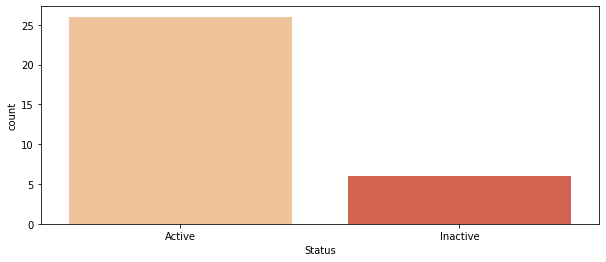

In [260]:
f, ax = pp.subplots(1, sharey=True, figsize=(10, 4))
#countplots
sns.countplot(x="Status",data= Station_2016,palette="OrRd")

pp.show()

In [261]:
Station_2016["month"] = Station_2016["Go_live_date"].apply(lambda dt: dt.month)
Station_2016["weekday"] = Station_2016["Go_live_date"].apply(lambda dt: dt.dayofweek)
Station_2016.head()

,Station_ID,Station_Name,Go_live_date,Status,month,weekday
75,3093,33rd & Diamond,2016-04-28,Active,4,3
76,3095,29th & Diamond,2016-04-28,Inactive,4,3
77,3096,29th & Dauphin,2016-04-29,Active,4,4
78,3097,"Berks Station, MFL",2016-04-29,Active,4,4
79,3098,10th & Federal,2016-05-02,Active,5,0


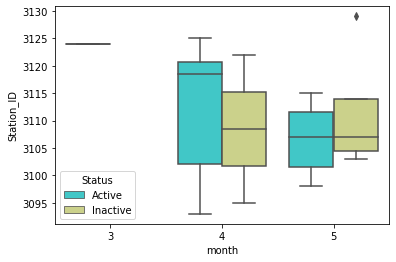

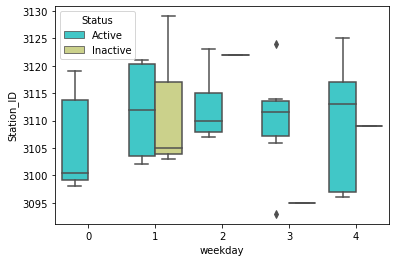

In [262]:
sns.boxplot(x="month",y="Station_ID", data= Station_2016 ,palette="rainbow", hue="Status")
pp.show()
sns.boxplot(x="weekday",y="Station_ID", data= Station_2016 ,palette="rainbow", hue="Status")
pp.show()

In [263]:
#picking out the unavaible stations
Station_2016.loc[Station_2016['Status'] == "Inactive"]

,Station_ID,Station_Name,Go_live_date,Status,month,weekday
76,3095,29th & Diamond,2016-04-28,Inactive,4,3
84,3103,"27th & Master, Athletic Recreation Center",2016-05-03,Inactive,5,1
86,3105,Penn Treaty Park,2016-05-03,Inactive,5,1
90,3109,Parkside & Girard,2016-05-06,Inactive,5,4
103,3122,"24th & Cecil B. Moore, Cecil B. Moore Library",2016-04-27,Inactive,4,2
107,3129,"The Children's Hospital of Philadelphia, Osler...",2016-05-24,Inactive,5,1


In [264]:
#df2 = pd.concat([df, Station_2016])
#df2.loc[df2["start_station_id"]== 3095]
#df2.loc[df2["start_station_id"]== 3103]
#df2.loc[df2["start_station_id"]== 3105]
#df2.loc[df2["start_station_id"]== 3109]
#df2.loc[df2["start_station_id"]== 3122]
#df2.loc[df2["start_station_id"]== 3129]
m = folium.Map(location=[39.952583,-75.165222], zoom_start = 13) 
tooltip = "29th & Diamond"
tooltip1 = "27th & Master, Athletic Recreation Center"
tooltip2 = "Penn Treaty Park"
tooltip3 = "Parkside & Girard"
tooltip4 = "24th & Cecil B. Moore, Cecil B. Moore Library"
tooltip5 = "The Children's Hospital of Philadelphia, Osler..."
folium.Marker(
    [39.987709, -75.1805], popup="UNAVAIBLE", tooltip=tooltip
    
).add_to(m)
folium.Marker(
    [39.977139, -75.179398], popup="UNAVAIBLE", tooltip=tooltip1
    
).add_to(m)

folium.Marker(
    [39.966518, -75.129959], popup="UNAVAIBLE", tooltip=tooltip2
    
).add_to(m)
folium.Marker(
    [39.974861, -75.205238], popup="UNAVAIBLE", tooltip=tooltip3
    
).add_to(m)
folium.Marker(
    [39.980621, -75.1735], popup="UNAVAIBLE", tooltip=tooltip4
    
).add_to(m)
folium.Marker(
    [39.946812, -75.193108], popup="UNAVAIBLE", tooltip=tooltip5
    
).add_to(m)
m

NameError: name 'folium' is not defined